In [1]:
import numpy as np
from datetime import datetime
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd

import gdal

%matplotlib inline

In [2]:
ds1 = xr.open_mfdataset('C:/Users/panmits86/Desktop/Python/data/SARAL-AltiKa/IGDR/2017_Q1/SRL_IPN_2PTP10*.nc')
ds2 = xr.open_mfdataset('C:/Users/panmits86/Desktop/Python/data/JASON_3/IGDR/2017_Q1/JA3_IPN_2PdP0*.nc')

C:\Users\panmits86\Anaconda3\envs\gallery\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
C:\Users\panmits86\Anaconda3\envs\gallery\lib\site-packages\xarray\backends\api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
C:\Users\panmits86\Anaconda3\envs\gallery\lib\site

In [3]:
wave_heights_sa = ds1['swh']
wave_heights_ja = ds2['swh_ku']

In [4]:
surface_type = ds1['surface_type']
surface_type

<xarray.DataArray 'surface_type' (time: 956)>
dask.array<concatenate, shape=(956,), dtype=float32, chunksize=(33,), chunktype=numpy.ndarray>
Coordinates:
    lat      (time) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    lon      (time) float64 dask.array<chunksize=(32,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2017-01-01T23:19:46.052876928 ... 2017-03-30T10:25:20.155400960
Attributes:
    comment:        Computed using a DTM2000 file: 0 = open oceans or semi-en...
    flag_meanings:  ocean lake_enclosed_sea ice land
    flag_values:    [0 1 2 3]
    long_name:      surface type

In [5]:
# apply a surface type flag. type 3 = land, type 0 = ocean.
wh = wave_heights_sa[surface_type < 3.]

In [6]:
buoys = pd.read_excel('buoys.xlsx', header=0, index_col=None, usecols="D:E")

In [7]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top = False
    gl.xlocator = mticker.FixedLocator([-74, -73, -72, -71, -70])
    gl.ylocator = mticker.FixedLocator([40, 41, 42])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

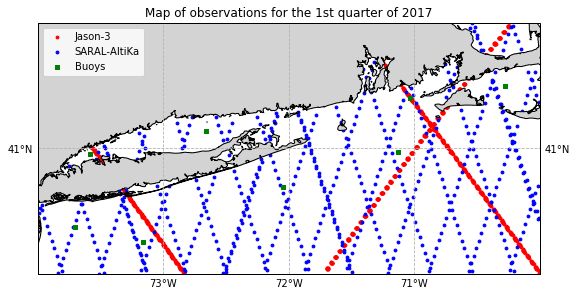

In [8]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-74, -70, 40, 42])

shp = shapereader.Reader('C:/Users/panmits86/Desktop/thesis/SNE_shapefile/GSHHS_f_L1_SNE.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')

# Add markers for the position of the buoys and satellite observations for the 1st quarter of 2017.
plt.scatter(wave_heights_ja['lon'], wave_heights_ja['lat'], s=8, marker='o', color='red', label='Jason-3',
             transform=ccrs.Geodetic())
plt.scatter(wh['lon'], wh['lat'], s=8, marker='o', color='blue', label='SARAL-AltiKa',
            transform=ccrs.Geodetic())
plt.scatter(buoys['Longitude'], buoys['Latitude'], s=10, marker='s', color='green', label='Buoys',
            transform=ccrs.Geodetic())
ax.legend(loc='upper left')
ax.set_title('Map of observations for the 1st quarter of 2017')
plt.savefig('SNE_obs.png', dpi=300, bbox_inches='tight')